<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/M_SummaryBarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

## Data

In [ ]:
errorcL1 = pd.read_csv("Old_Criteria/Error/errorcL.csv")
errorcL2 = pd.read_csv("New_Criteria/Error/errorL.csv") 
errorN1 = pd.read_csv("Old_Criteria/Error/errorN.csv") 
errorN2 = pd.read_csv("New_Criteria/Error/errorN.csv") 
errordL = pd.read_csv("Old_Criteria/Error/errordL.csv")

In [ ]:
errordL

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,6.1,5.7,6.1,5.9,5.9,6.1,...,6.0,6.0,6.0,5.4,5.7,6.1,5.7,6.4,5.4,5.959615
1,2,old,0.1,CV,3.2,3.0,3.0,3.1,2.9,3.0,...,3.0,3.2,3.1,2.8,3.0,3.0,2.9,3.5,2.7,3.019231
2,3,old,0.2,BV + CV,6.7,6.5,6.3,6.9,6.7,6.1,...,6.8,6.2,6.5,6.6,6.4,6.5,6.9,7.4,6.1,6.596154
3,4,old,1.1,PB1 + CV,5.6,5.5,5.6,5.5,5.2,5.6,...,5.4,5.4,5.8,5.5,5.6,5.3,5.4,6.0,5.2,5.528846
4,5,old,1.2,PB1 + BV + CV,7.9,8.3,8.0,8.4,8.4,8.1,...,8.6,7.7,8.2,8.2,8.2,8.1,8.6,9.0,7.7,8.315385
5,6,old,2.1,PB2 + CV,4.3,4.2,4.4,4.1,4.2,4.1,...,4.3,4.3,4.2,3.8,4.0,4.4,4.3,4.5,3.8,4.240385
6,7,old,2.2,PB2 + BV + CV,6.8,6.9,6.7,6.7,6.8,6.5,...,7.2,6.8,6.8,6.6,6.6,6.8,6.9,7.2,6.4,6.815385


In [ ]:
#reorder the steps: 2,4,6,3,5,7
errorcL1 = errorcL1.iloc[[1,3,5,2,4,6],:]
errorcL2 = errorcL2.iloc[[1,3,5,2,4,6],:]
errorN1 = errorN1.iloc[[1,3,5,2,4,6],:]
errorN2 = errorN2.iloc[[1,3,5,2,4,6],:]
errordL = errordL.iloc[[1,3,5,2,4,6],:]

In [ ]:
errorcL1 = errorcL1[errorcL1.Step != 1]
errorcL2 = errorcL2[errorcL2.Step != 1]
errorN1 = errorN1[errorN1.Step != 1]
errorN2 = errorN2[errorN2.Step != 1]
errordL = errordL[errordL.Step != 1]

In [ ]:
errordL

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
1,2,old,0.1,CV,3.2,3.0,3.0,3.1,2.9,3.0,...,3.0,3.2,3.1,2.8,3.0,3.0,2.9,3.5,2.7,3.019231
3,4,old,1.1,PB1 + CV,5.6,5.5,5.6,5.5,5.2,5.6,...,5.4,5.4,5.8,5.5,5.6,5.3,5.4,6.0,5.2,5.528846
5,6,old,2.1,PB2 + CV,4.3,4.2,4.4,4.1,4.2,4.1,...,4.3,4.3,4.2,3.8,4.0,4.4,4.3,4.5,3.8,4.240385
2,3,old,0.2,BV + CV,6.7,6.5,6.3,6.9,6.7,6.1,...,6.8,6.2,6.5,6.6,6.4,6.5,6.9,7.4,6.1,6.596154
4,5,old,1.2,PB1 + BV + CV,7.9,8.3,8.0,8.4,8.4,8.1,...,8.6,7.7,8.2,8.2,8.2,8.1,8.6,9.0,7.7,8.315385
6,7,old,2.2,PB2 + BV + CV,6.8,6.9,6.7,6.7,6.8,6.5,...,7.2,6.8,6.8,6.6,6.6,6.8,6.9,7.2,6.4,6.815385


In [ ]:
list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns)

['ReClassd_1',
 'ReClassd_2',
 'ReClassd_3',
 'ReClassd_4',
 'ReClassd_5',
 'ReClassd_6',
 'ReClassd_7',
 'ReClassd_8',
 'ReClassd_9',
 'ReClassd_10',
 'ReClassd_11',
 'ReClassd_12',
 'ReClassd_13',
 'ReClassd_14',
 'ReClassd_15',
 'ReClassd_16',
 'ReClassd_17',
 'ReClassd_18',
 'ReClassd_19',
 'ReClassd_20',
 'ReClassd_21',
 'ReClassd_22',
 'ReClassd_23',
 'ReClassd_24',
 'ReClassd_25',
 'ReClassd_26',
 'ReClassd_27',
 'ReClassd_28',
 'ReClassd_29',
 'ReClassd_30',
 'ReClassd_31',
 'ReClassd_32',
 'ReClassd_33',
 'ReClassd_34',
 'ReClassd_35',
 'ReClassd_36',
 'ReClassd_37',
 'ReClassd_38',
 'ReClassd_39',
 'ReClassd_40',
 'ReClassd_41',
 'ReClassd_42',
 'ReClassd_43',
 'ReClassd_44',
 'ReClassd_45',
 'ReClassd_46',
 'ReClassd_47',
 'ReClassd_48',
 'ReClassd_49',
 'ReClassd_50']

In [ ]:
errcL1 = errorcL1.melt(id_vars = ['Step','Criteria','Error Added'], value_vars=list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns), var_name = 'replicate', value_name='values')
errcL2 = errorcL2.melt(id_vars = ['Step','Criteria','Error Added'], value_vars=list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns), var_name = 'replicate', value_name='values')
errN1 = errorN1.melt(id_vars = ['Step','Criteria','Error Added'], value_vars=list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns), var_name = 'replicate', value_name='values')
errN2 = errorN2.melt(id_vars = ['Step','Criteria','Error Added'], value_vars=list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns), var_name = 'replicate', value_name='values')
errdL = errordL.melt(id_vars = ['Step','Criteria','Error Added'], value_vars=list(errorcL1.loc[:,'ReClassd_1':'ReClassd_50'].columns), var_name = 'replicate', value_name='values')

In [ ]:
errcL1['LipoType'] = 'cLDL'
errcL2['LipoType'] = 'cLDL'
errN1['LipoType'] = 'NHDL'
errN2['LipoType'] = 'NHDL'
errdL['LipoType'] = 'dLDL'
all_err1 = pd.concat([errcL1, errN1, errcL2, errN2])
all_err1['Type'] = all_err1['LipoType']+'_'+all_err1['Criteria']
errdL['Type'] = 'dLDL'
all_err = pd.concat([all_err1, errdL])
all_err

,Step,Criteria,Error Added,replicate,values,LipoType,Type
0,2,old,CV,ReClassd_1,3.7,cLDL,cLDL_old
1,4,old,PB1 + CV,ReClassd_1,7.0,cLDL,cLDL_old
2,6,old,PB2 + CV,ReClassd_1,5.4,cLDL,cLDL_old
3,3,old,BV + CV,ReClassd_1,7.0,cLDL,cLDL_old
4,5,old,PB1 + BV + CV,ReClassd_1,9.3,cLDL,cLDL_old
...,...,...,...,...,...,...,...
295,4,old,PB1 + CV,ReClassd_50,5.4,dLDL,dLDL
296,6,old,PB2 + CV,ReClassd_50,4.3,dLDL,dLDL
297,3,old,BV + CV,ReClassd_50,6.9,dLDL,dLDL
298,5,old,PB1 + BV + CV,ReClassd_50,8.6,dLDL,dLDL


In [ ]:
all_err.loc[:,'BV'] = np.select(condlist = [(all_err['Step']==2) | (all_err['Step']==4) | (all_err['Step']==6),
                                            (all_err['Step']==3) | (all_err['Step']==5) | (all_err['Step']==7)],
                                choicelist = ['Without BV','With BV'],
                                default = np.nan)
all_err

,Step,Criteria,Error Added,replicate,values,LipoType,Type,BV
0,2,old,CV,ReClassd_1,3.7,cLDL,cLDL_old,Without BV
1,4,old,PB1 + CV,ReClassd_1,7.0,cLDL,cLDL_old,Without BV
2,6,old,PB2 + CV,ReClassd_1,5.4,cLDL,cLDL_old,Without BV
3,3,old,BV + CV,ReClassd_1,7.0,cLDL,cLDL_old,With BV
4,5,old,PB1 + BV + CV,ReClassd_1,9.3,cLDL,cLDL_old,With BV
...,...,...,...,...,...,...,...,...
295,4,old,PB1 + CV,ReClassd_50,5.4,dLDL,dLDL,Without BV
296,6,old,PB2 + CV,ReClassd_50,4.3,dLDL,dLDL,Without BV
297,3,old,BV + CV,ReClassd_50,6.9,dLDL,dLDL,With BV
298,5,old,PB1 + BV + CV,ReClassd_50,8.6,dLDL,dLDL,With BV


#Functions

###Create individual stacked bar charts

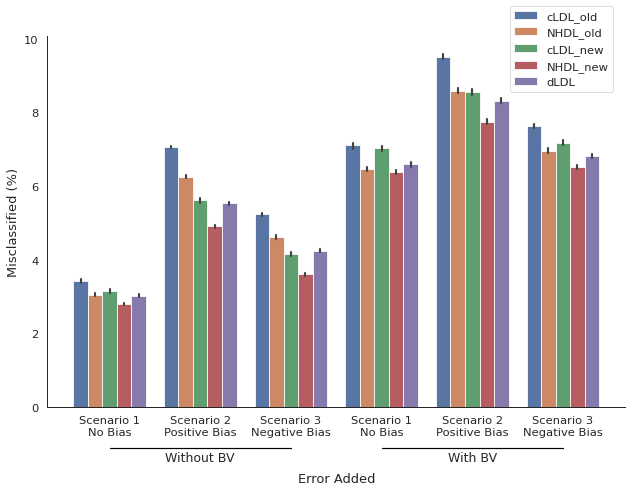

In [ ]:
sns.set_style("white")
sns.set_context('paper', font_scale = 1.3)
fig, ax = plt.subplots(figsize = (9,7))
sns.barplot(data=all_err, x="Error Added", y="values", hue="Type", estimator=np.mean, palette = 'deep', ax=ax)

sns.despine()
#plt.title('Summary of Variation', fontsize = 15)
labels = ['Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias', 'Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias']
labels1 = ['\n'.join(wrap(l, 11)) for l in [labels[0],labels[3]]]
labels2 = ['\n'.join(wrap(l, 15)) for l in [labels[1],labels[2],labels[4],labels[5]]]
labels = [labels1[0], labels2[0], labels2[1], labels1[1], labels2[2], labels2[3]]
ax.set_xticklabels(labels)
ax.set_xlabel('Error Added',labelpad = 35, fontsize = 13)

trans = ax.get_xaxis_transform()
ax.annotate("Without BV", xy=(1, -.12), xycoords=trans, ha="center", va="top")
ax.plot([0,2],[-.11,-.11], color="k", transform=trans, clip_on=False)
ax.annotate("With BV", xy=(4, -.12), xycoords=trans, ha="center", va="top")
ax.plot([3,5],[-.11,-.11], color="k", transform=trans, clip_on=False)

ax.set_ylabel('Misclassified (%)', fontsize = 13)
ax.legend(loc = (0.8,0.85)).set_title(None)
plt.tight_layout()
fig.savefig('Figures/Summary.jpg', dpi = 600)